<a href="https://www.kaggle.com/code/shaikhabdulrafay03/taylor-swift-data?scriptVersionId=159023249" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
import nltk
import spacy
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re
import string
from spacy.lang.en import English
from plotly.subplots import make_subplots


nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')
from nltk.corpus import stopwords
stop = stopwords.words('english')


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\minal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
df = pd.read_csv(r"C:\Users\minal\Downloads\taylor_swift_videos.csv")

df

,title,published_at,duration,view_count
0,Taylor Swift - You're Losing Me (From The Vault),2023-11-29T13:00:47Z,PT4M39S,7278886
1,"Rent on demand starting … you guessed it, Dece...",2023-11-27T20:21:45Z,PT1M1S,1050064
2,✨🫶 My name is Taylor and I was born in 1989 🫶✨,2023-10-31T20:08:57Z,PT19S,1196267
3,Taylor Swift - Cruel Summer (LP Giobbi Remix),2023-10-19T00:30:06Z,PT3M19S,696792
4,Taylor Swift - Cruel Summer (Live from Taylor ...,2023-10-19T00:30:25Z,PT3M55S,3437493
...,...,...,...,...
218,First fans with my CMT Award.,2008-06-26T21:55:43Z,PT11S,337626
219,TRL Recap!,2008-06-26T21:15:51Z,PT3M8S,742898
220,Wannabe,2008-06-26T21:02:39Z,PT3M45S,1217405
221,:-),2008-06-26T20:51:09Z,PT34S,805812


In [39]:
print("DataFrame Information:")
print("-" * 30)
print('DF Shape: ' ,df.shape)
print('number of Columns: ' ,len(df.columns))
print('number of Observations: ' ,len(df))
print('Number of values in df: ' , df.count().sum())
print('Total Number of Missing values in df: ' , df.isna().sum().sum())
print('percentage of Missing values : ' ,  "{:.2f}".format(df.isna().sum().sum()/df.count().sum() *100),'%')
print('Total Number of Duplicated records in df : ' , df.duplicated().sum().sum())
print('percentage of Duplicated values : ' ,  "{:.2f}".format(df.duplicated().sum().sum()/df.count().sum() *100),'%')

DataFrame Information:
------------------------------
DF Shape:  (223, 4)
number of Columns:  4
number of Observations:  223
Number of values in df:  892
Total Number of Missing values in df:  0
percentage of Missing values :  0.00 %
Total Number of Duplicated records in df :  0
percentage of Duplicated values :  0.00 %


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         223 non-null    object
 1   published_at  223 non-null    object
 2   duration      223 non-null    object
 3   view_count    223 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 7.1+ KB


In [41]:
df['published_at'] = pd.to_datetime(df['published_at'])
df['date'] = df['published_at'].dt.date
df['time'] = df['published_at'].dt.time

In [42]:
from datetime import time
def fromat_duration(value):
    s = value.strip('PT')
    s = s.split('M')
    if len(s) > 1:
        if s[1] != '':
            sec = s[1].strip('S')
        else:
            sec = 0
        min = s[0]
    else:
        min = '0'
        sec = s[0].strip('S')
        
    return time(minute= int(min) , second=int(sec))
         

def time_in_seconds(value):
    return (value.minute * 60) + value.second

df['duration'] = df['duration'].apply(fromat_duration)
df['time_in_sec'] = df['duration'].apply(time_in_seconds)


    

In [43]:
df

,title,published_at,duration,view_count,date,time,time_in_sec
0,Taylor Swift - You're Losing Me (From The Vault),2023-11-29 13:00:47+00:00,00:04:39,7278886,2023-11-29,13:00:47,279
1,"Rent on demand starting … you guessed it, Dece...",2023-11-27 20:21:45+00:00,00:01:01,1050064,2023-11-27,20:21:45,61
2,✨🫶 My name is Taylor and I was born in 1989 🫶✨,2023-10-31 20:08:57+00:00,00:00:19,1196267,2023-10-31,20:08:57,19
3,Taylor Swift - Cruel Summer (LP Giobbi Remix),2023-10-19 00:30:06+00:00,00:03:19,696792,2023-10-19,00:30:06,199
4,Taylor Swift - Cruel Summer (Live from Taylor ...,2023-10-19 00:30:25+00:00,00:03:55,3437493,2023-10-19,00:30:25,235
...,...,...,...,...,...,...,...
218,First fans with my CMT Award.,2008-06-26 21:55:43+00:00,00:00:11,337626,2008-06-26,21:55:43,11
219,TRL Recap!,2008-06-26 21:15:51+00:00,00:03:08,742898,2008-06-26,21:15:51,188
220,Wannabe,2008-06-26 21:02:39+00:00,00:03:45,1217405,2008-06-26,21:02:39,225
221,:-),2008-06-26 20:51:09+00:00,00:00:34,805812,2008-06-26,20:51:09,34


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   title         223 non-null    object             
 1   published_at  223 non-null    datetime64[ns, UTC]
 2   duration      223 non-null    object             
 3   view_count    223 non-null    int64              
 4   date          223 non-null    object             
 5   time          223 non-null    object             
 6   time_in_sec   223 non-null    int64              
dtypes: datetime64[ns, UTC](1), int64(2), object(4)
memory usage: 12.3+ KB


In [45]:
df[df['time_in_sec'] < 60]

,title,published_at,duration,view_count,date,time,time_in_sec
2,✨🫶 My name is Taylor and I was born in 1989 🫶✨,2023-10-31 20:08:57+00:00,00:00:19,1196267,2023-10-31,20:08:57,19
5,The Eras Tour concert film is now officially c...,2023-09-26 11:58:51+00:00,00:00:31,1338900,2023-09-26,11:58:51,31
6,Thank you for making these reveals so much cha...,2023-09-20 22:13:54+00:00,00:00:29,857197,2023-09-20,22:13:54,29
8,Pre order 1989 (Taylor’s Version) now on my si...,2023-08-10 06:26:11+00:00,00:00:16,1489197,2023-08-10,06:26:11,16
9,Summer forecast: Cruel. 😎,2023-07-21 18:56:15+00:00,00:00:26,2505814,2023-07-21,18:56:15,26
...,...,...,...,...,...,...,...
194,New conference table.,2010-03-12 16:10:46+00:00,00:00:31,1318531,2010-03-12,16:10:46,31
207,Retainers.,2008-11-17 21:25:40+00:00,00:00:59,3195952,2008-11-17,21:25:40,59
217,My band has bad private plane manners.,2008-06-26 21:58:19+00:00,00:00:25,837052,2008-06-26,21:58:19,25
218,First fans with my CMT Award.,2008-06-26 21:55:43+00:00,00:00:11,337626,2008-06-26,21:55:43,11


In [46]:
df[df['view_count'] > 10000000]

,title,published_at,duration,view_count,date,time,time_in_sec
7,TAYLOR SWIFT | THE ERAS TOUR Concert Film Offi...,2023-08-31 12:17:49+00:00,00:01:30,11545908,2023-08-31,12:17:49,90
11,Taylor Swift - Snow On The Beach (Feat. More L...,2023-05-26 04:00:01+00:00,00:03:50,11267965,2023-05-26,04:00:01,230
23,"It’s me, Benjamin 🐱 joining the #TSAntiHeroCha...",2022-11-11 17:04:21+00:00,00:00:16,50506505,2022-11-11,17:04:21,16
29,"It’s me, 👋 sharing ALL the problems. Join the ...",2022-11-04 14:53:16+00:00,00:00:16,57972784,2022-11-04,14:53:16,16
31,Total surprise 😉 Share yours with #TSAntiHero...,2022-11-01 12:31:39+00:00,00:00:16,78028885,2022-11-01,12:31:39,16
33,🫣 Join my #TSAntiHeroChallenge and share your ...,2022-10-21 12:10:21+00:00,00:00:16,125922041,2022-10-21,12:10:21,16
34,😺 Join my #TSAntiHeroChallenge and share your ...,2022-10-21 12:10:06+00:00,00:00:16,105500781,2022-10-21,12:10:06,16
51,Taylor Swift - Lover Remix Feat. Shawn Mendes ...,2019-11-13 12:27:46+00:00,00:03:42,39230523,2019-11-13,12:27:46,222
57,Taylor Swift - Lover's Lounge (Live),2019-08-22 21:47:44+00:00,00:33:43,15966196,2019-08-22,21:47:44,2023
58,Taylor Swift - Livestream Announcement (8/22/1...,2019-08-15 18:06:59+00:00,00:00:40,13821516,2019-08-15,18:06:59,40


In [47]:
df['title'] = df['title'].apply(str.lower)

In [48]:
#all taylor swift songs
import requests as req
soups = []
for i in range(1 , 5):
    r = req.get(f"https://www.oldies.com/artist-songs/Taylor-Swift/page_{i}.html")
    print(r.status_code)
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(r.text , "lxml")
    soups.append(soup)

200
200
200
200


In [49]:
name =[]
for soup in soups:
    names = soup.find_all('span' , {'class' : 'PLT'})   
    print(len(names))
    for i in names:
        name.append(i.string) 

521
350
0
0


In [50]:
songnames = [song.lower() for song in name]

In [51]:
def tour (title  , duration):
    x = ''
    if pd.Series(title).str.contains('tour').bool():
       x =  x +' tour'
        
    if pd.Series(title).str.contains('behind the scenes').bool():
        x = x + ' BTS'             

    if pd.Series(title).str.contains('short').bool():
        x = x + ' short'
    elif duration < 60:
        x = x + ' short'
    if pd.Series(title).str.contains('remix').bool():
        x = x + ' remix'            

    if pd.Series(title).str.contains('trailer').bool():
        x = x + ' trailer'            
    
    if pd.Series(title).str.contains('featuring').bool():
        x = x + ' featuring'            

    if  any(keyword.lower() in title for keyword in songnames ):
        x = x+' music'

    if duration < 60:
        x = x + ' short'
    if  x == '':
        return None      
    return x
df['Tags'] = df['Tags'] = df.apply(lambda row: tour(row['title'], row['time_in_sec']), axis=1)



In [52]:
tags = df['Tags'].str.get_dummies(sep=' ')

In [53]:
tags

,BTS,featuring,music,remix,short,tour,trailer
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0
3,0,0,1,1,0,0,0
4,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...
218,0,0,0,0,1,0,0
219,0,0,0,0,0,0,0
220,0,0,0,0,0,0,0
221,0,0,0,0,1,0,0


In [54]:
df = pd.concat([df , tags] ,axis=1 )

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   title         223 non-null    object             
 1   published_at  223 non-null    datetime64[ns, UTC]
 2   duration      223 non-null    object             
 3   view_count    223 non-null    int64              
 4   date          223 non-null    object             
 5   time          223 non-null    object             
 6   time_in_sec   223 non-null    int64              
 7   Tags          181 non-null    object             
 8   BTS           223 non-null    int64              
 9   featuring     223 non-null    int64              
 10  music         223 non-null    int64              
 11  remix         223 non-null    int64              
 12  short         223 non-null    int64              
 13  tour          223 non-null    int64              
 14  trailer   

In [56]:
df.describe()

,view_count,time_in_sec,BTS,featuring,music,remix,short,tour,trailer
count,2.230000e+02,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,4.245633e+06,173.605381,0.067265,0.008969,0.565022,0.062780,0.322870,0.107623,0.031390
std,1.401885e+07,254.861005,0.251043,0.094489,0.496869,0.243113,0.468625,0.310601,0.174762
min,4.781500e+04,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.871150e+05,43.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.571970e+05,122.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2.224946e+06,223.500000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.259220e+08,2553.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
df.describe(include='object')

,title,duration,date,time,Tags
count,223,223,223,223,181
unique,223,151,162,222,20
top,taylor swift - you're losing me (from the vault),00:00:31,2011-02-14,04:00:01,music
freq,1,16,10,2,69


In [58]:
tags['music'].value_counts()

music
1    126
0     97
Name: count, dtype: int64

In [59]:
line_chart = px.line(df, x='date', y='view_count', title='Line Chart')
line_chart.show()

In [60]:
line = px.line(df, x='time', y='view_count', title='Line Chart')
line.show()


In [61]:
temp = df.sort_values(by='time_in_sec' , ascending= True)
px.line(temp , x = 'time_in_sec' , y = 'view_count' , ) 


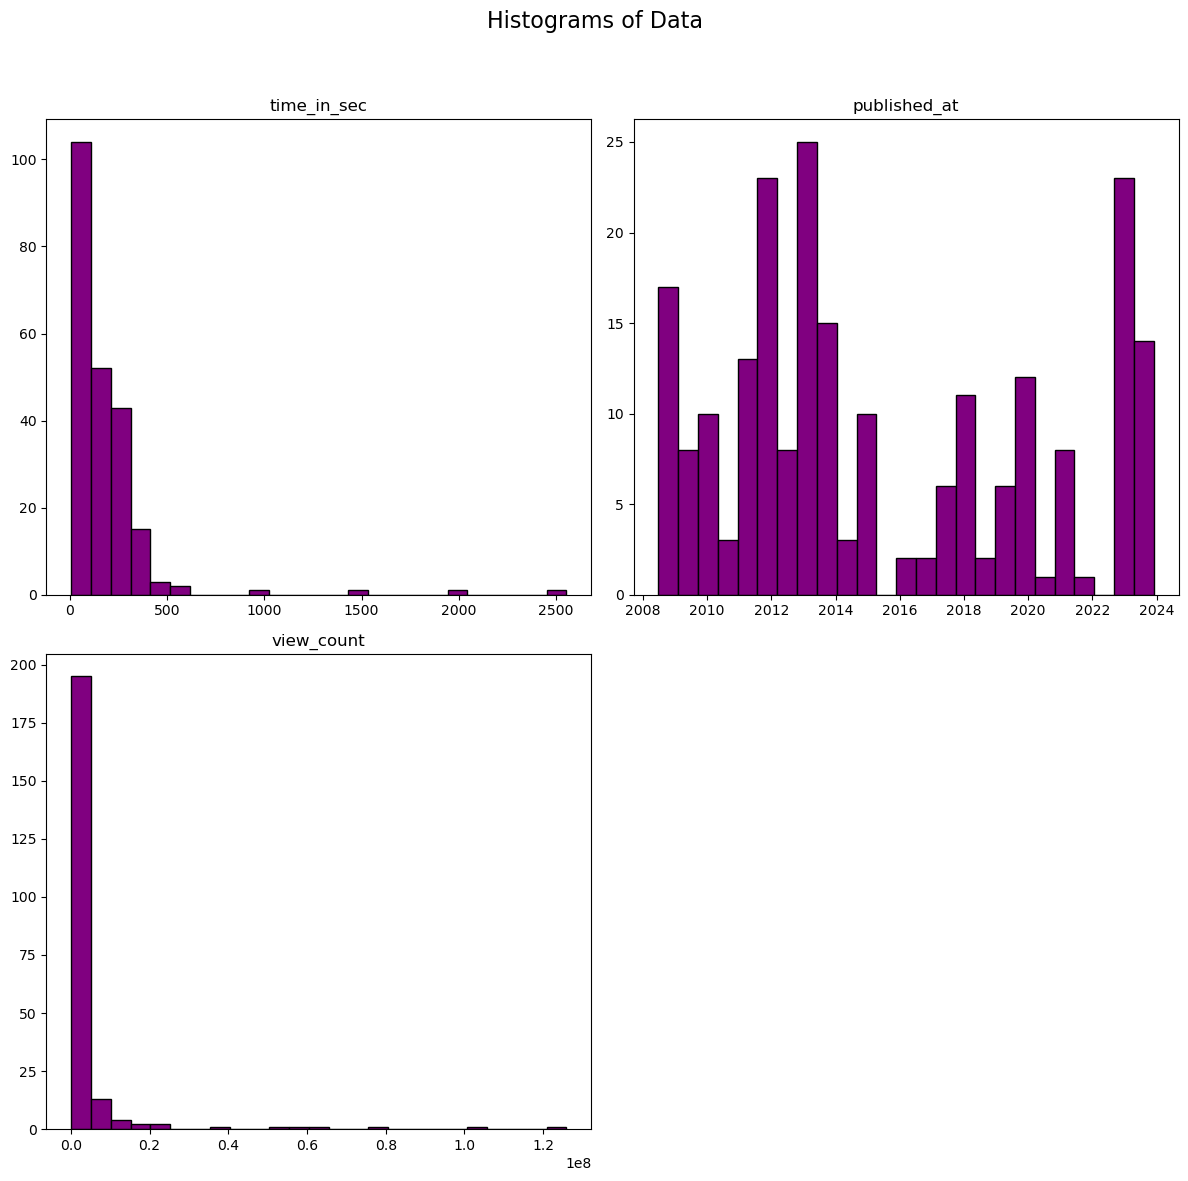

In [62]:


df[['time_in_sec' ,'published_at' , 'view_count'] ].hist(bins = 25, color='purple', edgecolor='black', grid=False , figsize = (12, 12) )
# Add titles and labels
plt.suptitle('Histograms of Data', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust spacing between subplots
plt.xlabel('Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Modify tick font size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Remove outer spines
for spine in plt.gca().spines.values():
    spine.set_visible(False)


plt.show()

In [63]:
fig = make_subplots(rows=3, cols=3 ,subplot_titles=['BTS','featuring','music','remix','tour','trailer' , 'short'] )
# Add histograms
fig.add_trace(go.Histogram(x=df['BTS']), row=1, col=1)
fig.add_trace(go.Histogram(x=df['featuring']), row=1, col=2)
fig.add_trace(go.Histogram(x=df['music']), row=1, col=3)
fig.add_trace(go.Histogram(x=df['remix']), row=2, col=1)
fig.add_trace(go.Histogram(x=df['tour']), row=2, col=2)
fig.add_trace(go.Histogram(x=df['trailer']), row=2, col=3)
fig.add_trace(go.Histogram(x=df['short']), row=3, col=1)




In [64]:
fig = make_subplots(rows=3, cols=3, subplot_titles=['BTS', 'featuring', 'music', 'remix', 'tour', 'trailer', 'short'])
colors = ['#7FFFD4', 'gold', 'purple', 'red', 'lightblue', 'black', 'pink', 'brown', 'gray']
for i in range(len(colors)):
    fig.add_trace(go.Histogram(x=df.iloc[:, i], marker_color=colors[i]), row=(i // 3) + 1, col=(i % 3) + 1)

fig.update_layout(title_text='Histograms with Custom Colors')
fig.show()

In [65]:
port_stem = PorterStemmer()
def stemming(title):
    stemmed_title = title.lower()
    stemmed_title = stemmed_title.split()
    stemmed_title = [port_stem.stem(word) for word in stemmed_title if not word in stopwords.words('english')]
    stemmed_title = ' '.join(stemmed_title)
    return stemmed_title

df['title'] = df['title'].apply(stemming)

In [66]:
df['title']

0                       taylor swift - lose (from vault)
1             rent demand start … guess it, decemb 13 🫶💋
2                            ✨🫶 name taylor born 1989 🫶✨
3          taylor swift - cruel summer (lp giobbi remix)
4      taylor swift - cruel summer (live taylor swift...
                             ...                        
218                                 first fan cmt award.
219                                           trl recap!
220                                               wannab
221                                                  :-)
222                                                 said
Name: title, Length: 223, dtype: object

In [67]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
import pandas as pd

nltk.download('punkt')

titles = df['title']

def tokenize(title):
    tokens = word_tokenize(title)
    return tokens

tokenized_titles = titles.apply(tokenize)

model = Word2Vec(sentences=tokenized_titles, vector_size=100, window=5, min_count=1, workers=4)

def get_embedding(title):
    tokens = tokenize(title)
    title_embedding = sum([model.wv[token] for token in tokens]) / len(tokens)
    return title_embedding

embeddings = titles.apply(get_embedding)

embeddings_array = pd.DataFrame(embeddings.tolist()).to_numpy()

embedding_columns = [f'embedding_{i+1}' for i in range(embeddings_array.shape[1])]
df[embedding_columns] = pd.DataFrame(embeddings_array)

df.drop('title', axis=1, inplace=True)
print(df)


                 published_at  duration  view_count        date      time  \
0   2023-11-29 13:00:47+00:00  00:04:39     7278886  2023-11-29  13:00:47   
1   2023-11-27 20:21:45+00:00  00:01:01     1050064  2023-11-27  20:21:45   
2   2023-10-31 20:08:57+00:00  00:00:19     1196267  2023-10-31  20:08:57   
3   2023-10-19 00:30:06+00:00  00:03:19      696792  2023-10-19  00:30:06   
4   2023-10-19 00:30:25+00:00  00:03:55     3437493  2023-10-19  00:30:25   
..                        ...       ...         ...         ...       ...   
218 2008-06-26 21:55:43+00:00  00:00:11      337626  2008-06-26  21:55:43   
219 2008-06-26 21:15:51+00:00  00:03:08      742898  2008-06-26  21:15:51   
220 2008-06-26 21:02:39+00:00  00:03:45     1217405  2008-06-26  21:02:39   
221 2008-06-26 20:51:09+00:00  00:00:34      805812  2008-06-26  20:51:09   
222 2008-06-26 15:47:41+00:00  00:04:22     7313288  2008-06-26  15:47:41   

     time_in_sec          Tags  BTS  featuring  music  ...  embedding_91  \

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\minal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\minal\AppData\Local\Temp\ipykernel_9604\2103873247.py:28: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\minal\AppData\Local\Temp\ipykernel_9604\2103873247.py:28: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\minal\AppData\Local\Temp\ipykernel_9604\2103873247.py:28: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calli

In [68]:
df

,published_at,duration,view_count,date,time,time_in_sec,Tags,BTS,featuring,music,...,embedding_91,embedding_92,embedding_93,embedding_94,embedding_95,embedding_96,embedding_97,embedding_98,embedding_99,embedding_100
0,2023-11-29 13:00:47+00:00,00:04:39,7278886,2023-11-29,13:00:47,279,None,0,0,0,...,0.003998,0.000082,0.001196,-0.005051,0.008237,0.001648,0.004232,-0.001025,-0.000044,-0.001099
1,2023-11-27 20:21:45+00:00,00:01:01,1050064,2023-11-27,20:21:45,61,None,0,0,0,...,-0.000710,0.000915,0.000551,-0.002024,0.005376,-0.000790,-0.000444,0.000198,-0.001695,-0.000787
2,2023-10-31 20:08:57+00:00,00:00:19,1196267,2023-10-31,20:08:57,19,short short,0,0,0,...,0.001661,-0.000749,-0.000068,-0.000955,-0.000374,0.003265,0.000925,0.000395,-0.000533,0.000516
3,2023-10-19 00:30:06+00:00,00:03:19,696792,2023-10-19,00:30:06,199,remix music,0,0,1,...,0.002216,0.001800,0.002747,-0.002096,0.006047,0.001631,0.001464,-0.001243,0.000091,0.000051
4,2023-10-19 00:30:25+00:00,00:03:55,3437493,2023-10-19,00:30:25,235,tour music,0,0,1,...,0.004140,0.001126,0.001111,-0.003229,0.003737,0.004178,0.002875,-0.001953,0.000255,0.000496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,2008-06-26 21:55:43+00:00,00:00:11,337626,2008-06-26,21:55:43,11,short short,0,0,0,...,0.000325,0.003749,0.000805,0.002667,0.000613,-0.001375,-0.006453,0.000267,-0.000659,0.007206
219,2008-06-26 21:15:51+00:00,00:03:08,742898,2008-06-26,21:15:51,188,None,0,0,0,...,0.001474,0.001095,-0.001164,-0.000287,0.000337,0.001472,-0.002842,0.002434,-0.004837,0.001222
220,2008-06-26 21:02:39+00:00,00:03:45,1217405,2008-06-26,21:02:39,225,None,0,0,0,...,-0.001956,-0.003234,0.001960,0.006051,0.006080,-0.005385,-0.001699,-0.005304,0.005130,-0.005674
221,2008-06-26 20:51:09+00:00,00:00:34,805812,2008-06-26,20:51:09,34,short short,0,0,0,...,-0.002397,0.002903,0.004264,-0.002383,0.012386,0.006177,0.004864,-0.001440,0.003329,-0.006567


In [69]:
df.drop(['time', 'date', 'Tags'], axis=1, inplace=True)


In [70]:
df

,published_at,duration,view_count,time_in_sec,BTS,featuring,music,remix,short,tour,...,embedding_91,embedding_92,embedding_93,embedding_94,embedding_95,embedding_96,embedding_97,embedding_98,embedding_99,embedding_100
0,2023-11-29 13:00:47+00:00,00:04:39,7278886,279,0,0,0,0,0,0,...,0.003998,0.000082,0.001196,-0.005051,0.008237,0.001648,0.004232,-0.001025,-0.000044,-0.001099
1,2023-11-27 20:21:45+00:00,00:01:01,1050064,61,0,0,0,0,0,0,...,-0.000710,0.000915,0.000551,-0.002024,0.005376,-0.000790,-0.000444,0.000198,-0.001695,-0.000787
2,2023-10-31 20:08:57+00:00,00:00:19,1196267,19,0,0,0,0,1,0,...,0.001661,-0.000749,-0.000068,-0.000955,-0.000374,0.003265,0.000925,0.000395,-0.000533,0.000516
3,2023-10-19 00:30:06+00:00,00:03:19,696792,199,0,0,1,1,0,0,...,0.002216,0.001800,0.002747,-0.002096,0.006047,0.001631,0.001464,-0.001243,0.000091,0.000051
4,2023-10-19 00:30:25+00:00,00:03:55,3437493,235,0,0,1,0,0,1,...,0.004140,0.001126,0.001111,-0.003229,0.003737,0.004178,0.002875,-0.001953,0.000255,0.000496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,2008-06-26 21:55:43+00:00,00:00:11,337626,11,0,0,0,0,1,0,...,0.000325,0.003749,0.000805,0.002667,0.000613,-0.001375,-0.006453,0.000267,-0.000659,0.007206
219,2008-06-26 21:15:51+00:00,00:03:08,742898,188,0,0,0,0,0,0,...,0.001474,0.001095,-0.001164,-0.000287,0.000337,0.001472,-0.002842,0.002434,-0.004837,0.001222
220,2008-06-26 21:02:39+00:00,00:03:45,1217405,225,0,0,0,0,0,0,...,-0.001956,-0.003234,0.001960,0.006051,0.006080,-0.005385,-0.001699,-0.005304,0.005130,-0.005674
221,2008-06-26 20:51:09+00:00,00:00:34,805812,34,0,0,0,0,1,0,...,-0.002397,0.002903,0.004264,-0.002383,0.012386,0.006177,0.004864,-0.001440,0.003329,-0.006567


In [71]:
from sklearn.preprocessing import RobustScaler

newdf = df.copy()

newdf['year'] = df['published_at'].dt.year
newdf['month'] = df['published_at'].dt.month
newdf['day'] = df['published_at'].dt.day
newdf['hour'] = df['published_at'].dt.hour
newdf['minute'] = df['published_at'].dt.minute
newdf['day_of_week'] = df['published_at'].dt.dayofweek

newdf.drop(['published_at', 'duration'], axis=1, inplace=True)

cont_columns = ['day_of_week', 'minute', 'hour', 'day', 'month', 'year', 'time_in_sec', 'view_count']

scaler = RobustScaler()
newdf[cont_columns] = scaler.fit_transform(newdf[cont_columns])

print(newdf)


     view_count  time_in_sec  BTS  featuring  music  remix  short  tour  \
0      3.313854     0.872222    0          0      0      0      0     0   
1      0.099527    -0.338889    0          0      0      0      0     0   
2      0.174974    -0.572222    0          0      0      0      1     0   
3     -0.082776     0.427778    0          0      1      1      0     0   
4      1.331538     0.627778    0          0      1      0      0     1   
..          ...          ...  ...        ...    ...    ...    ...   ...   
218   -0.268120    -0.616667    0          0      0      0      1     0   
219   -0.058983     0.366667    0          0      0      0      0     0   
220    0.185882     0.572222    0          0      0      0      0     0   
221   -0.026517    -0.488889    0          0      0      0      1     0   
222    3.331607     0.777778    0          0      1      0      0     0   

     trailer  embedding_1  ...  embedding_97  embedding_98  embedding_99  \
0          0    -0.0055

In [73]:
y = newdf.pop('view_count')

In [74]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(newdf, y, test_size=0.2, random_state=42)
print("Training shape:", xtrain.shape, ytrain.shape)
print("Testing shape:", xtest.shape, ytest.shape)



Training shape: (178, 114) (178,)
Testing shape: (45, 114) (45,)


In [86]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

linear = LinearRegression()
ridge = Ridge()
lasso = Lasso()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
svr = SVR()
knn = KNeighborsRegressor()
nn = MLPRegressor()
xgb = XGBRegressor()


In [88]:
linear.fit(xtrain, ytrain)
ridge.fit(xtrain, ytrain)
lasso.fit(xtrain, ytrain)
dt.fit(xtrain, ytrain)
rf.fit(xtrain, ytrain)
gb.fit(xtrain, ytrain)
svr.fit(xtrain, ytrain)
knn.fit(xtrain, ytrain)
nn.fit(xtrain, ytrain)
xgb.fit(xtrain, ytrain)


c:\Users\minal\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [90]:
linear_pred = linear.predict(xtest)
ridge_pred = ridge.predict(xtest)
lasso_pred = lasso.predict(xtest)
dt_pred = dt.predict(xtest)
rf_pred = rf.predict(xtest)
gb_pred = gb.predict(xtest)
svr_pred = svr.predict(xtest)  
knn_pred = knn.predict(xtest)
nn_pred = nn.predict(xtest)
xgb_pred = xgb.predict(xtest)
